In [1]:
%matplotlib inline

In [ ]:
import nilearn
from nilearn import datasets
from nilearn import plotting
from nilearn import image
from nilearn.decomposition import CanICA
from nilearn.plotting import plot_prob_atlas
from nilearn.image import iter_img
from nilearn.image import threshold_img
from nilearn.image import load_img, math_img
from nilearn.plotting import plot_stat_map, show
from nilearn.connectome import ConnectivityMeasure
from nilearn.regions import RegionExtractor
from nilearn.input_data import NiftiMapsMasker
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

import os
import fnmatch
import numpy as np
import nibabel as nb
from nipype.interfaces import afni
from nipype.utils.filemanip import split_filename
import matplotlib.pyplot as plt

In [3]:
####
###   Create the list of Subject's EPI of M06
####

StrokFolder='/NAS/tupac/cecile/STROKDEM/Data'
fs=1./2.4 #1/TR
highpass_freq = 0.01
lowpass_freq = 0.1
listFile= []
for filename in sorted(os.listdir(StrokFolder)):
    p=StrokFolder+'/'+filename+'/M06/melodic/filtered_func_data_clean.nii.gz'
    p2=StrokFolder+'/'+filename+'/M06/melodic/filtered_func_data_clean_bpfiltered.nii.gz'
    if os.path.isfile(p) and not os.path.isfile(p2):        
        #listFile.append(p)
        print(p)
           
        path, name, ext = split_filename(p)
        out_file = os.path.join(path, name + '_bpfiltered' + ext)
        img = nb.load(p)
        timepoints = img.shape[-1]
        F = np.zeros((timepoints))
        lowidx = timepoints/2 + 1
        if lowpass_freq > 0:
            lowidx = np.round(float(lowpass_freq) / fs * timepoints)
        highidx = 0
        if highpass_freq > 0:
            highidx = np.round(float(highpass_freq) / fs * timepoints)
        F[int(highidx):int(lowidx)] = 1
        F = ((F + F[::-1]) > 0).astype(int)
        print('load volume')
        data = img.get_data()
        print('start filtering')
        if np.all(F == 1):
            filtered_data = data
        else:
            filtered_data = np.real(np.fft.ifftn(np.fft.fftn(data) * F))+np.repeat(np.mean(data, (3))[:, :,:, np.newaxis], data.shape[3], axis=3)
        print('finish filtering')
        img_out = nb.Nifti1Image(filtered_data, img.affine,img.header)
        img_out.to_filename(out_file)
        print('saved %s'%(out_file))
    if os.path.isfile(p2): 
        path, name, ext = split_filename(p)
        out_file = os.path.join(path, name + '_bpfiltered' + ext)
        listFile.append(out_file)

print(listFile)
print(len(listFile))

['/NAS/tupac/cecile/STROKDEM/Data/270525RL/M06/melodic/filtered_func_data_clean_bpfiltered.nii.gz', '/NAS/tupac/cecile/STROKDEM/Data/290318AB/M06/melodic/filtered_func_data_clean_bpfiltered.nii.gz', '/NAS/tupac/cecile/STROKDEM/Data/290729JL/M06/melodic/filtered_func_data_clean_bpfiltered.nii.gz', '/NAS/tupac/cecile/STROKDEM/Data/300403PP/M06/melodic/filtered_func_data_clean_bpfiltered.nii.gz', '/NAS/tupac/cecile/STROKDEM/Data/310109JP/M06/melodic/filtered_func_data_clean_bpfiltered.nii.gz', '/NAS/tupac/cecile/STROKDEM/Data/310317GD/M06/melodic/filtered_func_data_clean_bpfiltered.nii.gz', '/NAS/tupac/cecile/STROKDEM/Data/321230AL/M06/melodic/filtered_func_data_clean_bpfiltered.nii.gz', '/NAS/tupac/cecile/STROKDEM/Data/330930MD/M06/melodic/filtered_func_data_clean_bpfiltered.nii.gz', '/NAS/tupac/cecile/STROKDEM/Data/340303JV/M06/melodic/filtered_func_data_clean_bpfiltered.nii.gz', '/NAS/tupac/cecile/STROKDEM/Data/350112GC/M06/melodic/filtered_func_data_clean_bpfiltered.nii.gz', '/NAS/tup

In [5]:
####
###    Compute canICA on the M06epi
###       save the results
####

canica = CanICA(n_components=3, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0)
canica.fit("/NAS/deathrow/protocoles/predistim/2018-12-12_3dmultigre/17/17002RR/QSM_20190828/QSM.nii.gz")
#components_img_strok = canica.components_img_
#components_img_strok.to_filename('canica_StrokdemM06_resting_state.nii.gz')

[MultiNiftiMasker.fit] Loading data from [/NAS/deathrow/protocoles/predistim/2018-12-12_3dmultigre/17/17002RR/QSM_20190828/QSM.nii.gz]
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[0.000335],
       ...,
       [0.000335]], dtype=float32), random_state=0, transpose=True, n_components=3, n_iter=3)
___________________________________________________randomized_svd - 4.8s, 0.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Memory]5.4s, 0.1min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/942296c14aafb76d89fcfd8f41504d23
_____________________________________________fastica cache loaded - 0.6s, 0.0min
[Memory]6.1s, 0.1min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/d6f81b117dfe4909c135a19a9ea3f560


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


_____________________________________________fastica cache loaded - 0.6s, 0.0min
[Memory]6.8s, 0.1min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/40e391aa3c845c2f5a910f7c091e80e9


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


_____________________________________________fastica cache loaded - 0.6s, 0.0min
[Memory]7.6s, 0.1min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/e562a60bb5014e1c711d16c4766bd263


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s


_____________________________________________fastica cache loaded - 0.6s, 0.0min
[Memory]8.3s, 0.1min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/264f7665b6a0ef2816b804a3778f914d


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.9s remaining:    0.0s


_____________________________________________fastica cache loaded - 0.6s, 0.0min
[Memory]9.0s, 0.2min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/2d4ffbdfc798370475833a59284dd99d


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.6s remaining:    0.0s


_____________________________________________fastica cache loaded - 0.6s, 0.0min
[Memory]9.7s, 0.2min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/8e90a6160ca4a47e232178058b4a546a


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.3s remaining:    0.0s


_____________________________________________fastica cache loaded - 0.6s, 0.0min
[Memory]10.4s, 0.2min   : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/265f8c5d59574364fb82630595d2223a


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.1s remaining:    0.0s


_____________________________________________fastica cache loaded - 0.6s, 0.0min
[Memory]11.2s, 0.2min   : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/50a388a72a13fac7e3763c4b02f8edc2


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.8s remaining:    0.0s


_____________________________________________fastica cache loaded - 0.6s, 0.0min
[Memory]11.9s, 0.2min   : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/fastica_/fastica/32dcf49ef8955a0f7dcf4b7381471476


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.5s remaining:    0.0s


_____________________________________________fastica cache loaded - 0.6s, 0.0min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.2s finished


ValueError: percentile must be in the range [0, 100]

/home/global/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/global/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/home/global/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:2785: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
/home/global/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


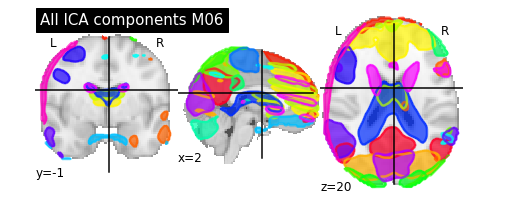

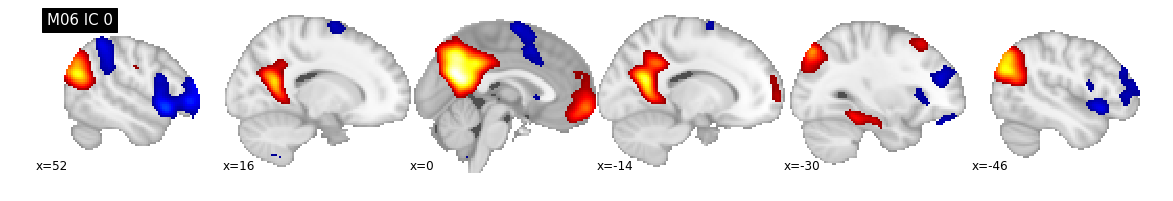

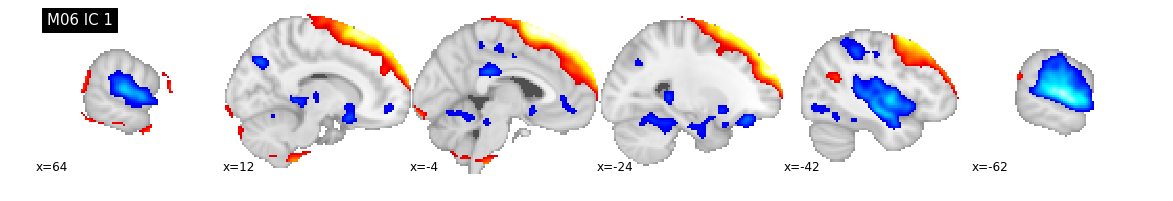

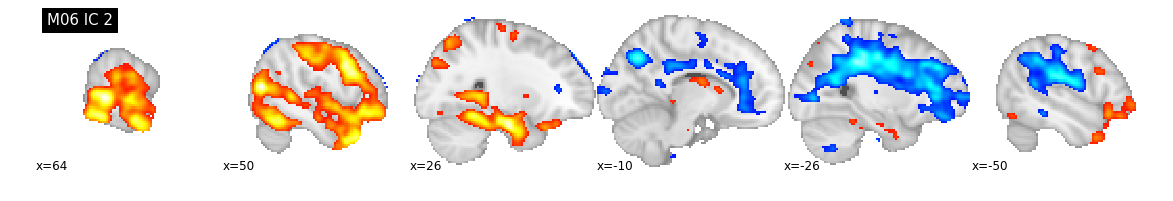

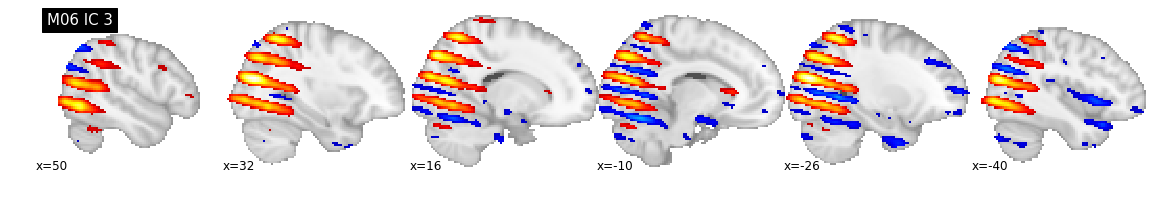

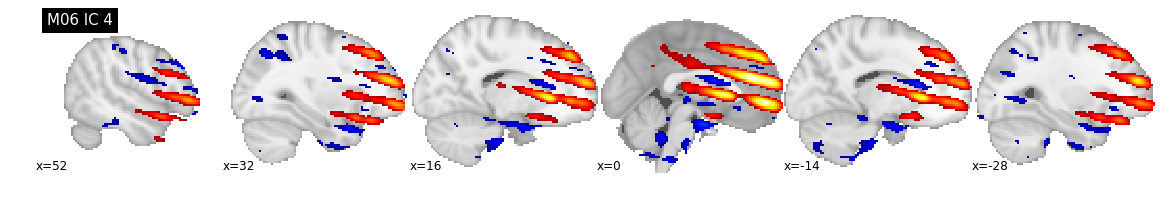

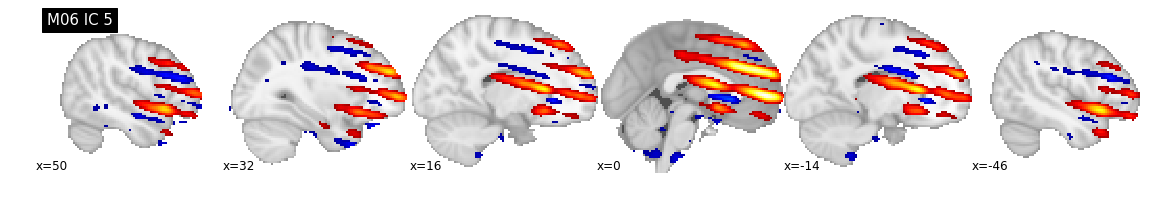

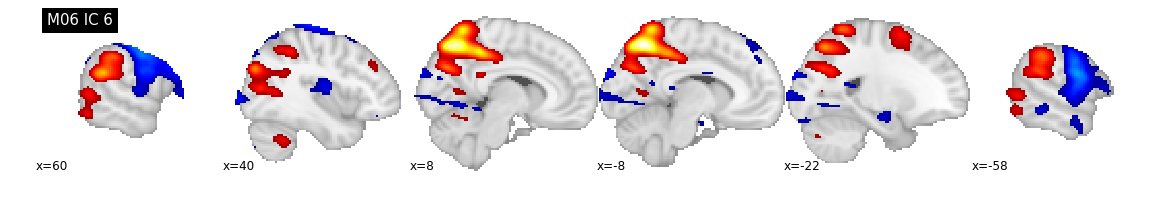

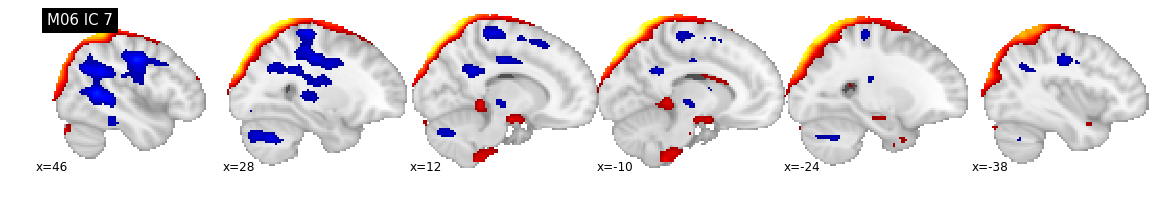

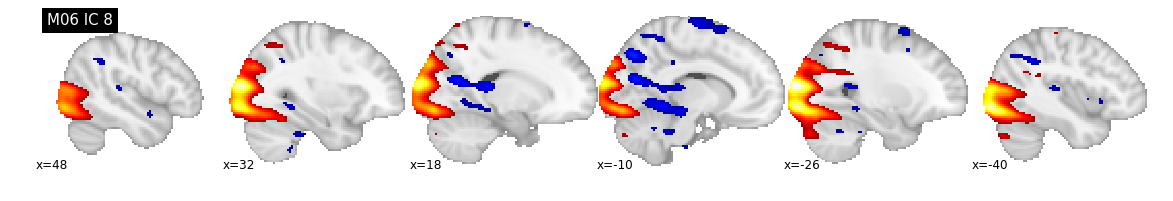

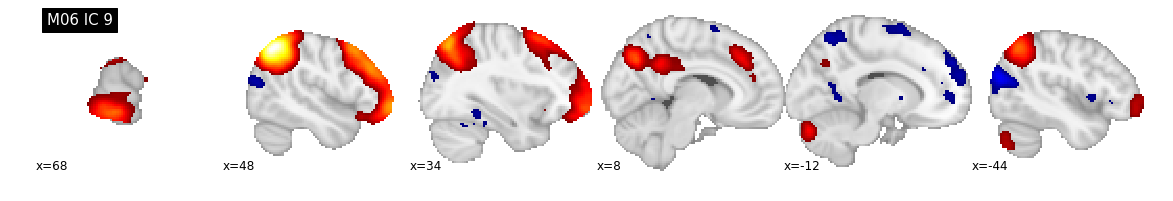

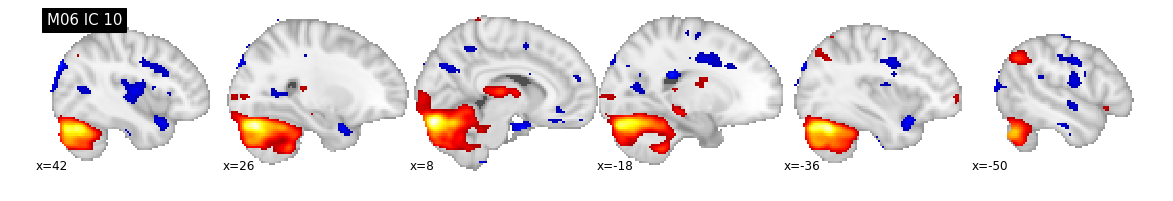

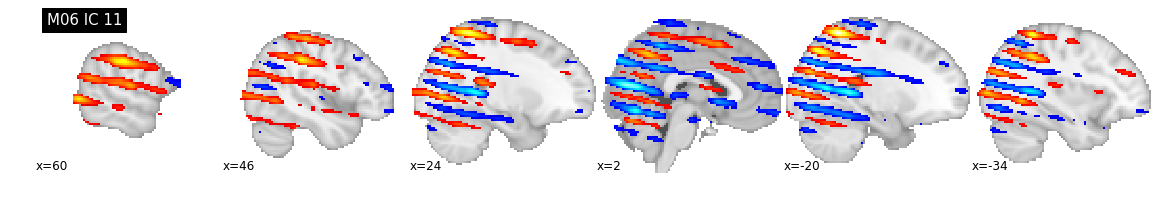

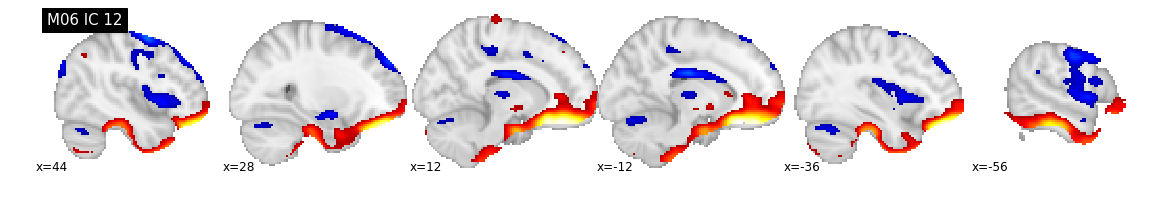

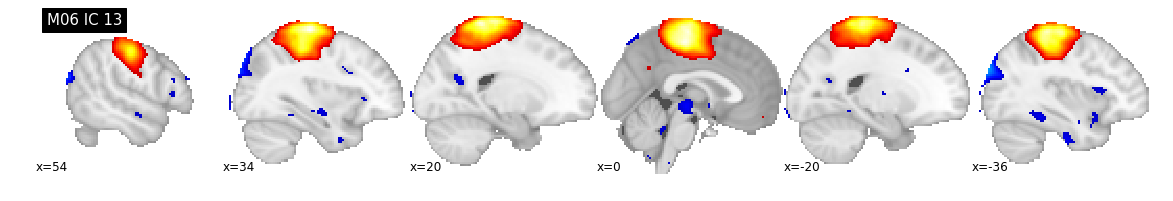

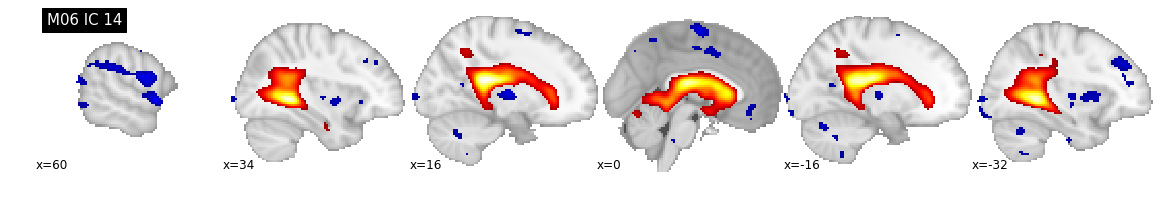

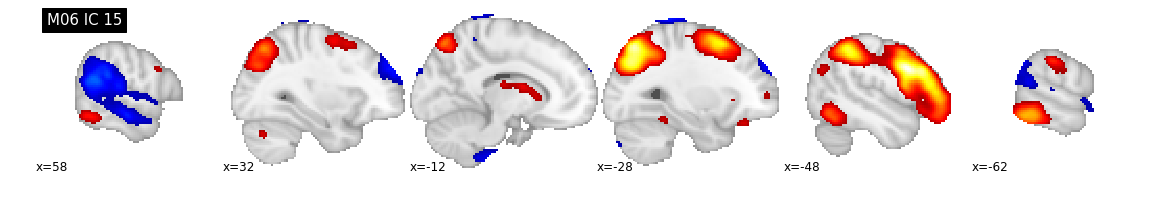

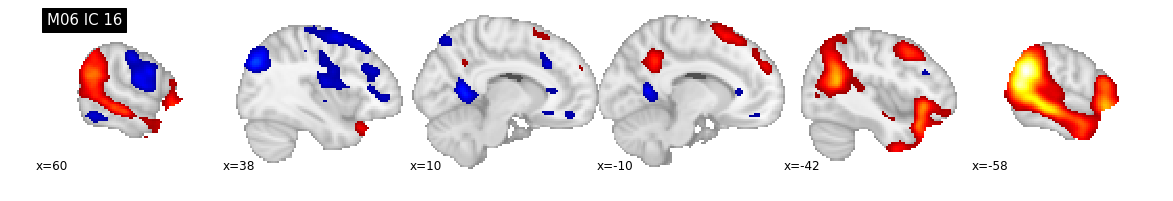

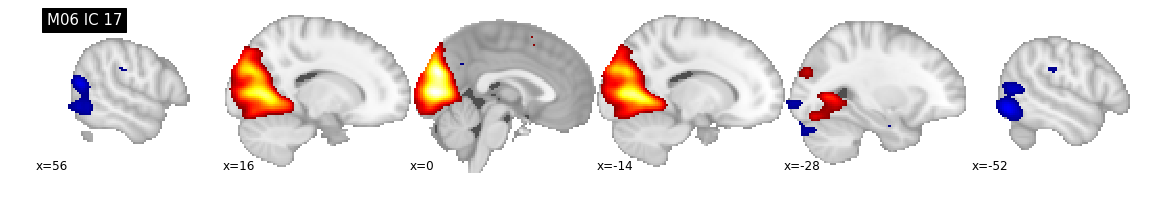

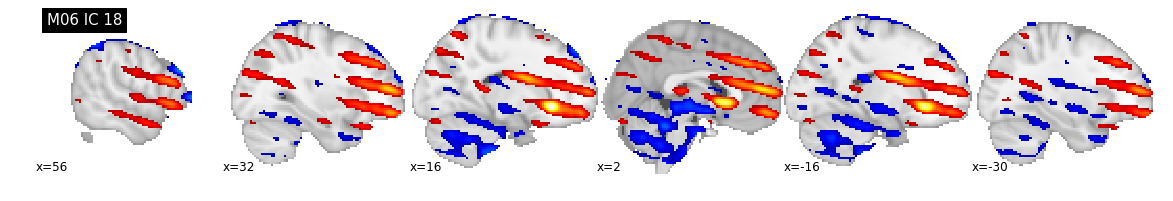

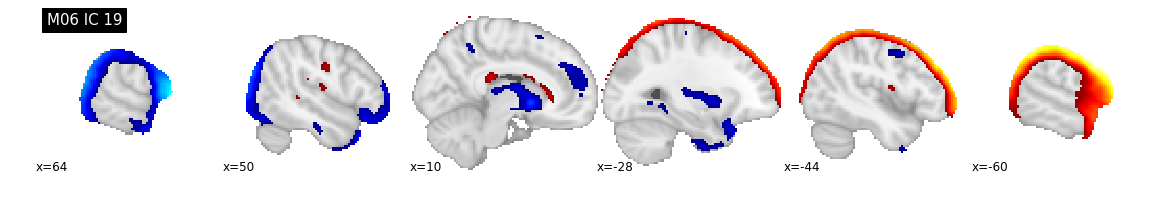

In [6]:
####
##   plot and save (in comment) the canICA from M06epi
###

file='canica_StrokdemM06_resting_state.nii.gz'
components_img_strok = image.load_img(file)

#All ICA together
plot_prob_atlas(components_img_strok, title='All ICA components M06')
#Plot ICA separatly
for i, cur_img in enumerate(iter_img(components_img_strok)):
    # print(np.amax(cur_img))
    display=plot_stat_map(cur_img, display_mode="x", title="M06 IC %d" % i,
                  cut_coords=6, colorbar=False)
    #display.savefig('./M06/M06_IC%d.png'%i)

show()
display.close()